# lab-predictions-logistic-regression
In this lab, you will be using the Sakila database of movie rentals. In order to optimize our inventory, we would like to know which films will be rented. We are asked to create a model to predict it. So we use the information we have from May 2005 to create the model.

Instructions
* 1.1 Create a query or queries to extract the information you think may be relevant for building the prediction model. It should include some film features and some rental features (X).
* 1.2 Create a query to get the list of all unique film titles and a boolean indicating if it was rented (rental_date) in May 2005. (Create new column called - 'rented_in_may'). This will be our TARGET (y) variable.
* 1.3 Read the data into a Pandas dataframe. At this point you should have 1000 rows. Number of columns depends on the number of features you chose.
* 2 Analyze extracted features (X) and transform them. You may need to encode some categorical variables, or scale numerical variables.
* 3.1 Create a logistic regression model to predict 'rented_in_may' from the cleaned data.
* 3.2 Evaluate the results.

In [1]:
# prep: import modules and get pwd
import pymysql
from sqlalchemy import create_engine
import numpy as np
import pandas as pd
import getpass  # To get the password without showing the input
password = getpass.getpass()

········


## Lab | predictions-logistic-regression | 1 | Get data

In [2]:
# 1.1 Create a query or queries to extract the information you think may be relevant for building the prediction model.
# It should include some film features and some rental features (X).

connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)

query0 = '''SELECT
    f.title, f.rental_duration, f.rental_rate, f.length, f.rating,
    COUNT(DISTINCT i.store_id) as st_availability,
    COUNT(DISTINCT CASE WHEN i.store_id = 1 THEN 1 ELSE NULL END) as av_store_1,
    COUNT(DISTINCT CASE WHEN i.store_id = 2 THEN 1 ELSE NULL END) as av_store_2,
    COUNT(r.rental_date) AS num_rentals
FROM film AS f
LEFT JOIN inventory AS i ON f.film_id = i.film_id
LEFT JOIN rental AS r ON i.inventory_id = r.inventory_id
GROUP BY f.title, f.rental_duration, f.rental_rate, f.length, f.rating;'''

data0 = pd.read_sql_query(query0, engine)
display(data0.head(),data0.shape)

,title,rental_duration,rental_rate,length,rating,st_availability,av_store_1,av_store_2,num_rentals
0,ACADEMY DINOSAUR,6,0.99,86,PG,2,1,1,23
1,ACE GOLDFINGER,3,4.99,48,G,1,0,1,7
2,ADAPTATION HOLES,7,2.99,50,NC-17,1,0,1,12
3,AFFAIR PREJUDICE,5,2.99,117,G,2,1,1,23
4,AFRICAN EGG,6,2.99,130,G,1,0,1,12


(1000, 9)

In [3]:
# 1.2 get the data. Create a query to get the list of all unique film titles and a boolean indicating 
# if it was rented (rental_date) in May 2005. (Create new column called - 'rented_in_may'). 
# This will be our TARGET (y) variable.

query1 = '''SELECT
    f.title,
    MAX(CASE WHEN r.rental_date >= '2005-05-01' AND r.rental_date < '2005-06-01' THEN 1 ELSE 0 END) AS rented_in_may
FROM
    sakila.film AS f
LEFT JOIN
    sakila.inventory AS i ON f.film_id = i.film_id
LEFT JOIN
    sakila.rental AS r ON i.inventory_id = r.inventory_id
GROUP BY
    f.title;'''
data1 = pd.read_sql_query(query1, engine)
data1.head()

,title,rented_in_may
0,ACADEMY DINOSAUR,1
1,ACE GOLDFINGER,0
2,ADAPTATION HOLES,1
3,AFFAIR PREJUDICE,1
4,AFRICAN EGG,1


In [4]:
# 1.3 Read the data into a Pandas dataframe. At this point you should have 1000 rows. 
# Number of columns depends on the number of features you chose.

query = '''SELECT
    f.title, f.rental_duration, f.rental_rate, f.length, f.rating,
    MAX(IF(MONTH(r.rental_date) = 5 AND YEAR(r.rental_date) = 2005, 1, 0)) AS rented_in_may,
    COUNT(DISTINCT i.store_id) as st_availability,
    COUNT(DISTINCT CASE WHEN i.store_id = 1 THEN 1 ELSE NULL END) as av_store_1,
    COUNT(DISTINCT CASE WHEN i.store_id = 2 THEN 1 ELSE NULL END) as av_store_2,
    COUNT(r.rental_date) AS num_rentals
FROM film AS f
LEFT JOIN inventory AS i ON f.film_id = i.film_id
LEFT JOIN rental AS r ON i.inventory_id = r.inventory_id
GROUP BY f.title, f.rental_duration, f.rental_rate, f.length, f.rating;'''

data = pd.read_sql_query(query, engine)
display(data.head(),data.shape)

,title,rental_duration,rental_rate,length,rating,rented_in_may,st_availability,av_store_1,av_store_2,num_rentals
0,ACADEMY DINOSAUR,6,0.99,86,PG,1,2,1,1,23
1,ACE GOLDFINGER,3,4.99,48,G,0,1,0,1,7
2,ADAPTATION HOLES,7,2.99,50,NC-17,1,1,0,1,12
3,AFFAIR PREJUDICE,5,2.99,117,G,1,2,1,1,23
4,AFRICAN EGG,6,2.99,130,G,1,1,0,1,12


(1000, 10)

## Lab | predictions-logistic-regression | 2 | Data Cleaning and Formatting

### Lab | predictions-logistic-regression | Data Cleaning and Formatting | Cleaning invalid values

### Lab | predictions-logistic-regression | Data Cleaning and Formatting | Formatting data types

In [5]:
data.dtypes

title               object
rental_duration      int64
rental_rate        float64
length               int64
rating              object
rented_in_may        int64
st_availability      int64
av_store_1           int64
av_store_2           int64
num_rentals          int64
dtype: object

In [6]:
# rented_in_may - as object
# data['rented_in_may']=data['rented_in_may'].astype(object)
# data['rented_in_may'].unique()

In [7]:
# av_store_1 - as object
# data['av_store_1']=data['av_store_1'].astype(object)
# data['av_store_1'].unique()

In [8]:
# av_store_2 - as object
# data['av_store_2']=data['av_store_2'].astype(object)
# data['av_store_2'].unique()

### Lab | predictions-logistic-regression | Data Cleaning and Formatting | Dealing with null values

In [9]:
columns_with_null_values = data.columns[data.isna().any()].tolist()
print("Columns with null values:",columns_with_null_values)
data.isna().sum()

Columns with null values: []


title              0
rental_duration    0
rental_rate        0
length             0
rating             0
rented_in_may      0
st_availability    0
av_store_1         0
av_store_2         0
num_rentals        0
dtype: int64

### Lab | predictions-logistic-regression | Data Cleaning and Formatting | Dealing with duplicates

In [10]:
# Drop all duplicate rows and keep the first occurrence
data = data.drop_duplicates()
print(data.shape)

(1000, 10)


### Lab | predictions-logistic-regression | Data Cleaning and Formatting | Explore values

In [11]:
data.columns

Index(['title', 'rental_duration', 'rental_rate', 'length', 'rating',
       'rented_in_may', 'st_availability', 'av_store_1', 'av_store_2',
       'num_rentals'],
      dtype='object')

In [12]:
# rental_duration
data['rental_duration']=data['rental_duration'].astype(object)
data['rental_duration'].value_counts()

6    212
3    203
4    203
7    191
5    191
Name: rental_duration, dtype: int64

In [13]:
# rental_rate
data['rental_rate'].value_counts()

0.99    341
4.99    336
2.99    323
Name: rental_rate, dtype: int64

In [14]:
# length
data['length'].value_counts()

85     17
179    13
112    13
84     13
73     12
       ..
81      3
96      2
66      2
95      2
55      2
Name: length, Length: 140, dtype: int64

In [15]:
# rating
data['rating'].value_counts()

PG-13    223
NC-17    210
R        195
PG       194
G        178
Name: rating, dtype: int64

In [16]:
# st_availability
data['st_availability'].value_counts()

2    563
1    395
0     42
Name: st_availability, dtype: int64

## Lab | predictions-logistic-regression | 3 | Data exploratory

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
numerical=data.select_dtypes('number')
numerical.columns

Index(['rental_rate', 'length', 'rented_in_may', 'st_availability',
       'av_store_1', 'av_store_2', 'num_rentals'],
      dtype='object')

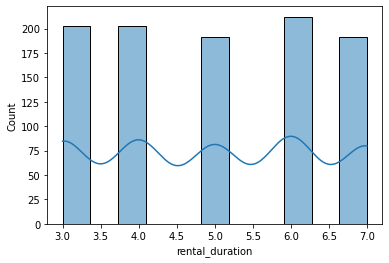

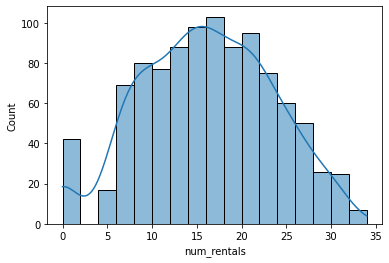

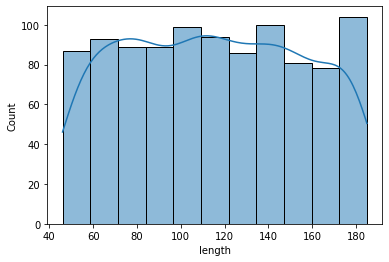

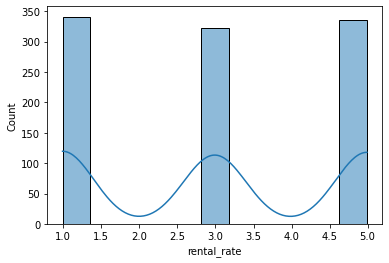

In [19]:
# look at the scale and distribution of values
sns.histplot(data['rental_duration'], kde=True)
plt.show()

sns.histplot(data['num_rentals'], kde=True)
plt.show()

sns.histplot(data['length'], kde=True)
plt.show()

sns.histplot(data['rental_rate'], kde=True)
plt.show()


## Lab | predictions-logistic-regression | 4 | Data exploratory | Multicolinearity

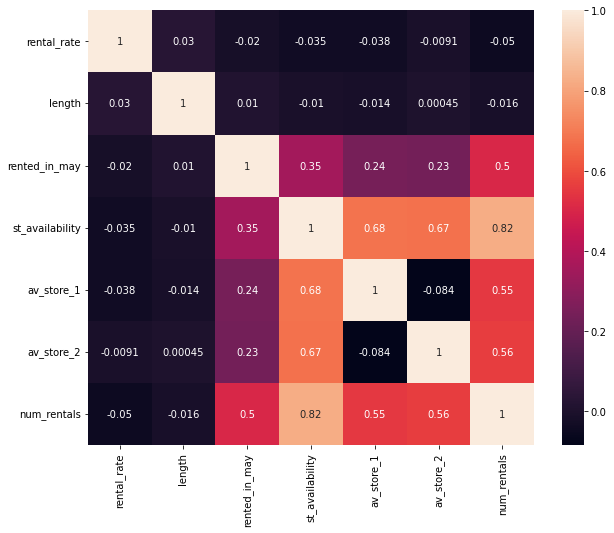

In [20]:
corr_matrix=data.corr()  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

# rental rate, rental duration, lenth and rented in may

In [21]:
data.columns

Index(['title', 'rental_duration', 'rental_rate', 'length', 'rating',
       'rented_in_may', 'st_availability', 'av_store_1', 'av_store_2',
       'num_rentals'],
      dtype='object')

In [22]:
data = data.drop(['title','av_store_1','st_availability','av_store_2'], axis=1)

## Lab | predictions-logistic-regression | 5 | Processing data

#### Processing Data
(Further processing...)
* X-y split.
* Scaling (numerical).

### Lab | predictions-logistic-regression | Processing data | X-y split

In [23]:
# X/y split feature/target
y = data['rented_in_may']
X = data.drop('rented_in_may', axis=1)

In [24]:
#Segregation between numerical and categorical variables
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)

## Lab | predictions-logistic-regression | 6 | train-test split

In [25]:
# split train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
data

,rental_duration,rental_rate,length,rating,rented_in_may,num_rentals
0,6,0.99,86,PG,1,23
1,3,4.99,48,G,0,7
2,7,2.99,50,NC-17,1,12
3,5,2.99,117,G,1,23
4,6,2.99,130,G,1,12
...,...,...,...,...,...,...
995,6,0.99,183,G,0,7
996,4,0.99,179,NC-17,0,6
997,6,0.99,105,NC-17,1,9
998,5,2.99,101,R,1,17


### Lab | predictions-logistic-regression | Processing data | Scaling numerical

In [27]:
# split numericals and categoricals: X_train_num, X_train_cat, X_test_num, X_test_cat
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler

X_train_num = X_train.select_dtypes(include = np.number)

# Scaling data
transformer = MinMaxScaler().fit(X_train_num) # need to keep transformer
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized, columns=X_num.columns)
X_train_norm

,rental_rate,length,num_rentals
0,0.5,0.258993,0.264706
1,0.5,0.136691,0.411765
2,0.0,0.489209,0.470588
3,0.5,0.179856,0.147059
4,0.5,0.280576,0.294118
...,...,...,...
795,0.5,0.122302,0.147059
796,1.0,0.733813,0.676471
797,1.0,0.467626,0.617647
798,0.0,0.546763,0.558824


### Lab | predictions-logistic-regression | Processing data | Enconding categoricals

In [28]:
X_train_cat = X_train.select_dtypes(include = object)
X_test_cat  = X_test.select_dtypes(include = object)

In [29]:
# encoding  categoricals
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(X_train_cat)
encoded_cat = encoder.transform(X_train_cat).toarray()
cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)
# reuse encoder 
X_train_cat = pd.DataFrame(encoded_cat, columns=cols)
X_train_cat

,rental_duration_4,rental_duration_5,rental_duration_6,rental_duration_7,rating_NC-17,rating_PG,rating_PG-13,rating_R
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
795,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
796,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
798,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [30]:
X_train_transformed = np.concatenate([X_train_norm, X_train_cat], axis=1)
X_train_transformed

array([[0.5       , 0.25899281, 0.26470588, ..., 0.        , 0.        ,
        1.        ],
       [0.5       , 0.13669065, 0.41176471, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.48920863, 0.47058824, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.4676259 , 0.61764706, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.54676259, 0.55882353, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.62589928, 1.        , ..., 1.        , 0.        ,
        0.        ]])

### Lab | predictions-logistic-regression | Processing data | Scaling (numerical)

In [31]:
#Transformation of test data

X_test_num = X_test.select_dtypes(include = np.number)

# Scaling data
# Using the transformer fitted previously on the training data
X_test_normalized = transformer.transform(X_test_num)
X_test_norm = pd.DataFrame(X_test_normalized,columns = X_test_num.columns)
X_test_norm.head()

,rental_rate,length,num_rentals
0,0.5,0.654676,0.294118
1,0.0,0.949640,0.970588
2,0.0,0.251799,0.705882
3,1.0,0.798561,0.382353
4,1.0,0.402878,0.676471


In [32]:
X_train_cat.columns

Index(['rental_duration_4', 'rental_duration_5', 'rental_duration_6',
       'rental_duration_7', 'rating_NC-17', 'rating_PG', 'rating_PG-13',
       'rating_R'],
      dtype='object')

In [33]:
X_test_cat.columns

Index(['rental_duration', 'rating'], dtype='object')

In [34]:
encoder = OneHotEncoder(drop='first').fit(X_test_cat)
encoded_cat = encoder.transform(X_test_cat).toarray()
cols = encoder.get_feature_names_out(input_features=X_test_cat.columns)
# reuse encoder 
X_test_cat = pd.DataFrame(encoded_cat, columns=cols)
X_test_cat

,rental_duration_4,rental_duration_5,rental_duration_6,rental_duration_7,rating_NC-17,rating_PG,rating_PG-13,rating_R
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
196,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
197,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
198,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [35]:
#Concatenate the tranformed X_test numerical normalized with the encoded X_test_cat

X_test_transformed = np.concatenate([X_test_norm, X_test_cat], axis=1)
X_test_transformed

array([[0.5       , 0.65467626, 0.29411765, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.94964029, 0.97058824, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.25179856, 0.70588235, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.5       , 0.38129496, 0.38235294, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.94964029, 0.67647059, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.48920863, 0.64705882, ..., 0.        , 1.        ,
        0.        ]])

## Lab | predictions-logistic-regression | 7 | Modeling

In [36]:
#logistic regression model

from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='saga',
                  multi_class='multinomial').fit(X_train_transformed, y_train)

In [37]:
predictions = classification.predict(X_test_transformed)
predictions
classification.score(X_test_transformed, y_test)

0.795

In [38]:
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1], dtype=int64)

In [39]:
print(y_test.value_counts())

1    135
0     65
Name: rented_in_may, dtype: int64


In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[ 35,  30],
       [ 11, 124]], dtype=int64)

In [41]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')
clf.fit(X_train_transformed, y_train)

KNeighborsClassifier()

In [42]:
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler

# fit transformer/scaler on X_train_num
X_train_num = X_train.select_dtypes(include = np.number)

# Scaling data
transformer = MinMaxScaler().fit(X_train_num) # need to keep transformer
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized, columns=X_train_num.columns)
X_train_norm.head()

,rental_rate,length,num_rentals
0,0.5,0.258993,0.264706
1,0.5,0.136691,0.411765
2,0.0,0.489209,0.470588
3,0.5,0.179856,0.147059
4,0.5,0.280576,0.294118


In [43]:
predictions_clf = clf.predict(X_test_transformed)
clf.score(X_test_transformed, y_test)

0.695